In [79]:
import pandas as pd

In [80]:
data = pd.read_csv("/content/matdisa.csv", sep=';')
data.head()

,NPM,NAMA,A,B,C,D
0,24083010001,MADINA HEDY ALIFANTI,0.5,0.6,0.7,0.8
1,24083010003,MARIA DWI KURNIASIH,0.4,0.9,0.0,0.7
2,24083010005,ADINDA PUTRI RACHMAWATI,0.2,0.1,0.5,1.0
3,24083010006,AQUINA SYABITA,0.1,0.1,0.1,0.1
4,24083010007,VARID PUTRA PRATAMA,0.5,0.7,0.9,0.5


In [81]:
df = pd.DataFrame(data)
df.head()

,NPM,NAMA,A,B,C,D
0,24083010001,MADINA HEDY ALIFANTI,0.5,0.6,0.7,0.8
1,24083010003,MARIA DWI KURNIASIH,0.4,0.9,0.0,0.7
2,24083010005,ADINDA PUTRI RACHMAWATI,0.2,0.1,0.5,1.0
3,24083010006,AQUINA SYABITA,0.1,0.1,0.1,0.1
4,24083010007,VARID PUTRA PRATAMA,0.5,0.7,0.9,0.5


In [82]:
import numpy as np

###**Feature weighting (matriks P berbasis variansi)**
pada code ini hanya memilih kolom numerik dan menghapus kolom NPM agar yang tersisa hanya data penilaian, menghitung variabel untuk melihat seberapa besar penyebaran nilainya antar mahasiswa dengan variansi besar yang bertujuan menghitung bobot prioritas Matrix P pada variabel A, B, C, dan D pada keempat mahasiswa dengan skor tertinggi. pada hasil output data menjabarkan bahwa Variansi tertinggi dimiliki oleh B (0.076897), sedangkan terendah pada (0.058242).

In [83]:
numerical_cols = df.select_dtypes(include=np.number).drop(columns=['NPM'])

variance = numerical_cols.var()
weights = variance / variance.sum()

print("Variances:")
display(variance)
print("\nWeights (Matrix P):")
display(weights)

Variances:


,0
A,0.060968
B,0.076897
C,0.071769
D,0.075256



Weights (Matrix P):


,0
A,0.214004
B,0.269919
C,0.251918
D,0.264159


Bagian df['Total Score'] = (numerical_cols * weights).sum(axis=1) melakukan perkalian setiap nilai mahasiswa pada variabel A, B, C, dan D dengan bobot masing-masing dari matriks P, seperti Laudya Meitaneia Sianturi mendapatkan peringkat teratas dimana proses ini bertujuan untuk menentukan empat baris (mahasiswa) dengan score tertinggi.

In [84]:
df['Total Score'] = (numerical_cols * weights).sum(axis=1)

top_4_students = df.sort_values(by='Total Score', ascending=False).head(4)
print("Top 4 students based on Total Score:")
display(top_4_students)

Top 4 students based on Total Score:


,NPM,NAMA,A,B,C,D,Total Score
32,24083010089,Laudya Meitaneia Sianturi,0.9,0.9,0.9,0.9,0.900000
31,24083010084,Muhammad Naufal Asruzzaman,0.8,0.9,0.9,0.8,0.852184
11,24083010036,Muhammad Handika,0.8,0.7,0.8,0.9,0.799424
21,24083010059,Izzati Kamila Putri,0.7,0.8,0.8,0.7,0.752184


###**matriks kovarian dan matriks korelasi**
np.cov(numerical_cols, rowvar=False, ddof=1) menghitung kovarian yang bertujuan arah dan besarnya hubungan linier dalam satuan asli data. np.corrcoef(numerical_cols, rowvar=False) menghitung korelasi yang menentukan nilai kovarian sehingga berada pada rentang -1 sampai 1. misalnya pada output A dan B sebesar 0.0602 berarti hubungan positif dan perubahan nilainya yang searah.

In [85]:
numerical_cols_cleaned = numerical_cols.dropna()

cov_mat = np.cov(numerical_cols_cleaned, rowvar=False, ddof=1)
corr_mat = np.corrcoef(numerical_cols_cleaned, rowvar=False)

print("Covariance Matrix:")
display(cov_mat)
print("\nCorrelation Matrix:")
display(corr_mat)

Covariance Matrix:


array([[0.06096795, 0.06021795, 0.04867949, 0.05044872],
       [0.06021795, 0.07689744, 0.05048718, 0.055     ],
       [0.04867949, 0.05048718, 0.07176923, 0.05576923],
       [0.05044872, 0.055     , 0.05576923, 0.07525641]])


Correlation Matrix:


array([[1.        , 0.87946637, 0.73591229, 0.74477929],
       [0.87946637, 1.        , 0.67960417, 0.72299453],
       [0.73591229, 0.67960417, 1.        , 0.75884619],
       [0.74477929, 0.72299453, 0.75884619, 1.        ]])

###**cosine similarity**
code ini bertujuan untuk mehitung panjang vektor (norm) tiap mahasiswa untuk normalisasi dimana menghitung seberapa mirip/kemiringan dan pola perbandingan arah vektor antar mahasiswa. Dapat kita lihat dari outputnya yakni baris dan kolom nilai mendekati 1 pada pola berdasarkan NPM berarti hampir memiliki pola indentik yang mirip.

In [86]:
X_matrix = numerical_cols.values

students = df['NPM']

norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)

cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)

cosine_df = pd.DataFrame(cosine_sim, index=students, columns=students)

print("Cosine Similarity Matrix:")
display(cosine_df)

Cosine Similarity Matrix:


NPM,24083010001,24083010003,24083010005,24083010006,24083010007,24083010014,24083010017,24083010019,24083010028,24083010029,...,24083010081,24083010084,24083010089,24083010090,24083010095,24083010099,24083010105,24083010106,24083010110,24083010115
NPM,,,,,,,,,,,,,,,,,,,,,
24083010001,1.000000,0.815628,0.871014,0.985527,0.960590,0.922113,0.952110,0.979500,0.984043,0.929618,...,0.991302,0.983827,0.985527,0.888256,0.989149,0.916909,0.997929,0.916909,0.947514,0.948446
24083010003,0.815628,1.000000,0.631497,0.827606,0.727896,0.890098,0.902342,0.831683,0.767334,0.853398,...,0.794521,0.821318,0.827606,0.750733,0.758566,0.907136,0.793179,0.907136,0.625742,0.776555
24083010005,0.871014,0.631497,1.000000,0.789352,0.732167,0.718693,0.804953,0.813581,0.789950,0.641629,...,0.805703,0.772539,0.789352,0.662994,0.907926,0.629844,0.860828,0.629844,0.906731,0.731517
24083010006,0.985527,0.827606,0.789352,1.000000,0.968963,0.960277,0.966092,0.993884,0.993399,0.975426,...,0.993127,0.998274,1.000000,0.944911,0.970495,0.944911,0.981495,0.944911,0.925820,0.938315
24083010007,0.960590,0.727896,0.732167,0.968963,1.000000,0.868441,0.874386,0.938343,0.987248,0.945152,...,0.986978,0.980421,0.968963,0.873326,0.932336,0.929670,0.972549,0.929670,0.897085,0.979130
24083010014,0.922113,0.890098,0.718693,0.960277,0.868441,1.000000,0.989563,0.975612,0.924260,0.963441,...,0.921887,0.947342,0.960277,0.967868,0.911234,0.919474,0.901850,0.919474,0.849530,0.827624
24083010017,0.952110,0.902342,0.804953,0.966092,0.874386,0.989563,1.000000,0.983044,0.932294,0.942351,...,0.936608,0.952268,0.966092,0.938953,0.945028,0.912871,0.932278,0.912871,0.883779,0.848943
24083010019,0.979500,0.831683,0.813581,0.993884,0.938343,0.975612,0.983044,1.000000,0.980010,0.961766,...,0.977913,0.985684,0.993884,0.960001,0.976467,0.918262,0.969117,0.918262,0.937197,0.898036
24083010028,0.984043,0.767334,0.789950,0.993399,0.987248,0.924260,0.932294,0.980010,1.000000,0.959759,...,0.997534,0.995574,0.993399,0.926158,0.971230,0.926158,0.986488,0.926158,0.940147,0.952835


###**Principal Component Analysis (PCA)**
data nilai dipilih (X) lalu dinormalisasi menggunakan StandardScaler() agar tiap variabel memiliki rata-rata 0 dan standar deviasi 1, sehingga perbedaan skala tidak memengaruhi hasil. PCA(n_components=None) diterapkan untuk mencari kombinasi variabel baru, kemudian PCA(n_components=None) dijalankan untuk menghitung kombinasi linier. explained_variance_ratio_ menunjukkan bahwa PC1 ber-sekitar 81,56% variasi, PC2 9,55%, PC3 yaitu 6,00%, dan PC4 yakni 2,88% sisanya.

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

X = df[['A', 'B', 'C', 'D']]

nan_row_index = X[X.isnull().any(axis=1)].index
if not nan_row_index.empty:
    X.loc[nan_row_index, ['A', 'B', 'C', 'D']] = np.random.rand(len(nan_row_index), 4)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=None)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Explained Variance Ratio:")
display(pca.explained_variance_ratio_)

Explained Variance Ratio:


array([0.81560269, 0.09553268, 0.06003097, 0.02883366])

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=df.index)

print("PCA Results (2 Components):")
display(pca_df.head())

PCA Results (2 Components):


,PC1,PC2
0,1.520217,0.608424
1,0.395019,-1.583144
2,-0.038018,1.971180
3,-2.623975,-0.111161
4,1.524199,0.411376


### **Prepare data for classification**
Membersihkan, menata, dan memberikan label target dapat dijelaskan bahwa code ini akan menghasilkan output dimana mahasiswa dengan skor sama atau lebih tinggi dari median akan masuk kategori High Performance, sedangkan yang skornya di bawah median akan masuk kategori Low Performance yang dimana bertujuan untuk membagi mahasiswa ke dalam dua kategori performa berdasarkan nilai Total Score.

In [89]:
median_score = df['Total Score'].median()

pca_df['target_variable'] = df['Total Score'].apply(lambda x: 'High Performance' if x >= median_score else 'Low Performance')

display(pca_df.head())

,PC1,PC2,target_variable
0,1.520217,0.608424,High Performance
1,0.395019,-1.583144,High Performance
2,-0.038018,1.971180,High Performance
3,-2.623975,-0.111161,Low Performance
4,1.524199,0.411376,High Performance


### **Perform classification**
Setelah menentukan tingkat kategori, code pada train_test_split akan membagi data menjadi training set (75%) dan testing set (25%) secara acak.

model = LogisticRegression() dan model.fit(X_train, y_train) akan membuat objek model klasifikasi yang akan memanfaatkan data yang sudah dibersihkan, diberi label target, dan dipilih fiturnya agar success dalam membangun model.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = pca_df[['PC1', 'PC2']]
y = pca_df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


### **Evaluate classification model**
code pada accuracy_score dan precision_score akan mengukur proporsi prediksi yang benar data testing dan menilai seberapa tepat model, sehingga f1_score menunjukan keseimbangan antara precision dan recall semuanya bernilai 1.0000 bahwa model memprediksi semua data testing dengan benar.


In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High Performance')
recall = recall_score(y_test, y_pred, pos_label='High Performance')
f1 = f1_score(y_test, y_pred, pos_label='High Performance')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


### **Interpret results**
Tujuannya code ini adalah agar hasil yang diperoleh dari model atau metode analisis dapat diubah menjadi insight yang dapat dipahami. Visualisasi menggunakan scatter plot untuk memetakan mahasiswa pada dua komponen utama (PC1 dan PC2) mengenai variansi dari data asli yang berhasil ditangkap. Dapat kita lihat bahwa outputya menghasilkan array([0.81560269, 0.09553268]) bahwa PC1 sekitar 81,56% variansi data asli dan PC2 9,55%.


Explained Variance Ratio:


array([0.81560269, 0.09553268])


Classification Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


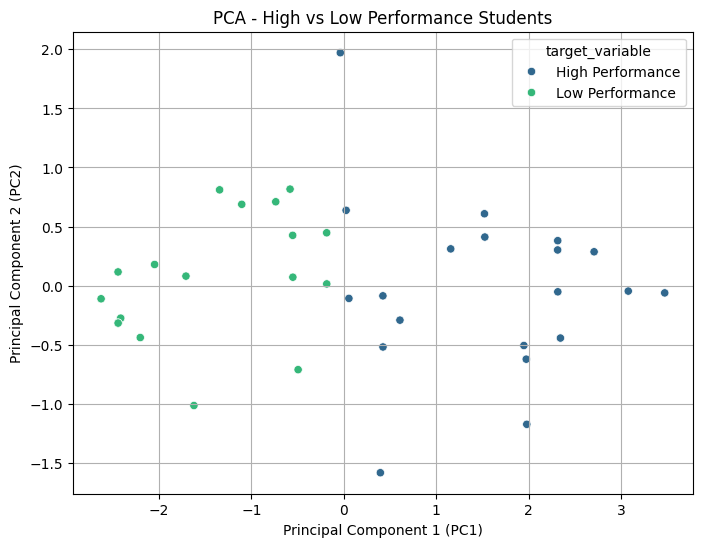

In [92]:
print("Explained Variance Ratio:")
display(pca.explained_variance_ratio_)

print("\nClassification Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target_variable', data=pca_df, palette='viridis')
plt.title('PCA - High vs Low Performance Students')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()

Menunjukan bobot atau kontribusi masing-masing fitur asli terhadap setiap komponen utama yang terbentuk dari analisis PCA yang dihasikan print("PCA Component Loadings:") diikuti print(pca.components_.T). Tujuannya untuk mereduksi dimensi data skor mahasiswa sehingga pola performa tinggi atau rendah.

In [93]:
print("PCA Component Loadings:")
print(pca.components_.T)

PCA Component Loadings:
[[ 0.51635049 -0.39994937]
 [ 0.50423346 -0.56283502]
 [ 0.48505606  0.60097951]
 [ 0.49381313  0.40259268]]


###**visualisasi matriks korelasi**
Baris plt.figure(figsize=(8, 6)) menentukan ukuran gambar
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5
membuat heatmap dengan nilai korelasi ditampilkan di setiap kotak, menggunakan skema warna coolwarm
linewidths=.5 dan plt.show() untuk menambah kotak serta grafik.

Menghasilkan output heatmap 4x4 antarempat fitur numerik. Misalnya, nilai 0.88 antara fitur 0 dan 1 menunjukkan korelasi positif dengan Tujuan hanya untuk memahami hubungan antar variabel sebelum melakukan PCA dan memberikan visualisasi yang cepat serta intuitif tentang struktur hubungan antar variabel numerik.




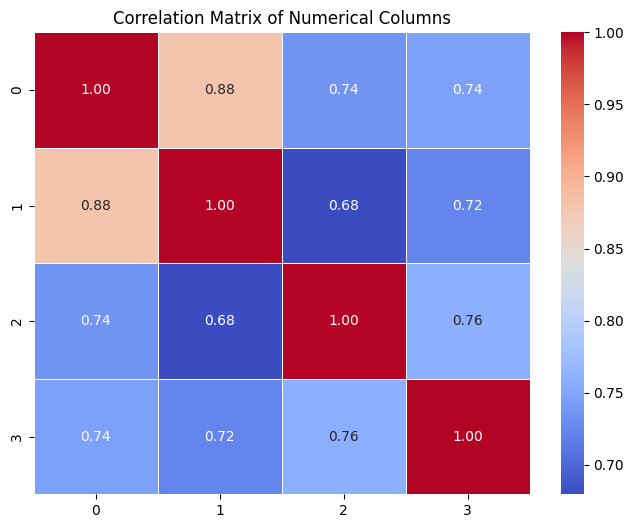

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

### **Perform K-Means Clustering**
Bertujuan untuk mengelompokkan data menggunakan K-Means Clustering setelah melakukan reduksi dimensi dengan PCA. setiap titik pada scatter plot mewakili satu sampel mahasiswa yang sudah direduksi ke dua komponen utama (PC1 dan PC2) i mana warna tiap titik menunjukkan cluster yang terbentuk.


PCA Results with 3 Clusters:


,PC1,PC2,target_variable,cluster_label
0,1.520217,0.608424,High Performance,2
1,0.395019,-1.583144,High Performance,0
2,-0.038018,1.971180,High Performance,0
3,-2.623975,-0.111161,Low Performance,1
4,1.524199,0.411376,High Performance,2


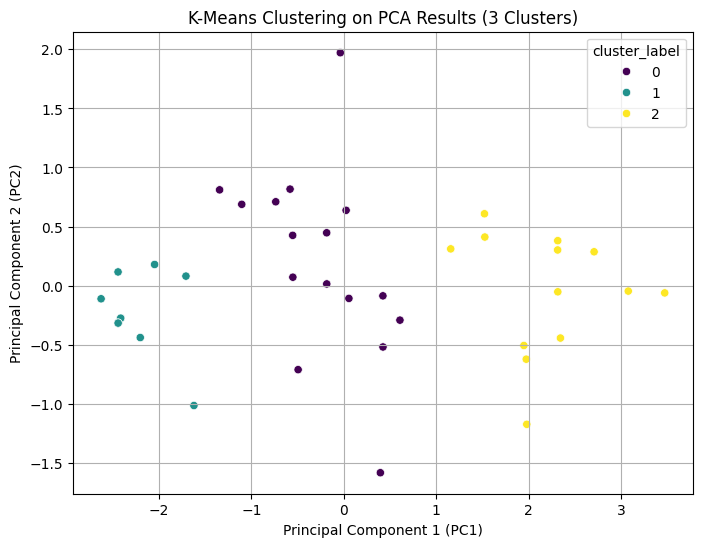

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
pca_df['cluster_label'] = kmeans.fit_predict(X_pca)

print(f"PCA Results with {n_clusters} Clusters:")
display(pca_df.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title(f'K-Means Clustering on PCA Results ({n_clusters} Clusters)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()